In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('machine.data',header=-1)
df.columns = ['vendor','model','myct','mmin','mmax','cach','chmin','chmax','prp','erp']

In [ ]:
df.head()

In [ ]:
df['model'].unique()

In [ ]:
def dummyEncode(df):
    column = list(df.select_dtypes(include=['category','object']))
    for x in column:
        dummies = pd.get_dummies(df[x],prefix = x,dummy_na = False)
        df = df.drop(x,1)
        df = pd.concat([df,dummies],axis=1)
    return df

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [ ]:
X = dummyEncode(X)
X.head()

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.pipeline import make_pipeline 

In [ ]:
model = LinearRegression()

x,xt,y,yt = train_test_split(X,Y,test_size = .3,random_state = 42)

scaler = StandardScaler()  
Stand_coef_linear_reg = make_pipeline(scaler, model)

In [ ]:
Stand_coef_linear_reg.fit(x,y)

In [ ]:
pred = Stand_coef_linear_reg.predict(xt)

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
print(mse(yt,pred))

In [5]:
X = df['prp'].values
Y= df['erp'].values

In [6]:
x,xt,y,yt = train_test_split(X,Y,test_size = .3,random_state = 42)

In [12]:
model = LinearRegression(normalize=True)

In [13]:
model.fit(x.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [14]:
pred = model.predict(xt.reshape(-1,1))

In [15]:
from sklearn.metrics import mean_squared_error as mse

In [16]:
print(mse(yt,pred))

2385.543174619102


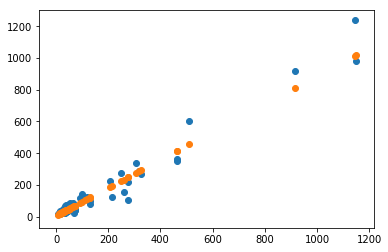

In [20]:
plt.scatter(xt,yt)
plt.scatter(xt,pred)
plt.show()

In [21]:
from sklearn.metrics import r2_score

In [22]:
print(r2_score(yt,pred))
print(r2_score(y,pred))

0.9557322895134278
